**Data Mining - Home Assignment 1**

Group 5:
- **Alberto Fallocco**
- **Emanuele Tartaglione**
- **Marcel Buczkowski**

Time spent - 5 hours each

### Objective 1

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics.cluster import silhouette_score, silhouette_samples, calinski_harabasz_score, 
from sklearn.metrics.cluster import homogeneity_score, completeness_score, v_measure_score
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import OPTICS, cluster_optics_dbscan
from sklearn.neighbors import NearestNeighbors
import warnings
warnings.filterwarnings("ignore")

data_train_normal = pd.read_csv('train.csv')
data_unique_normal = pd.read_csv('unique_m.csv')
data_unique_normal = data_unique_normal.drop("material", axis = 1)

# SPLIT INTO X and y both datasets
data_train = data_train_normal.drop("critical_temp", axis = 1).values
data_train_y = data_train_normal["critical_temp"]
data_unique = data_unique_normal.drop("critical_temp", axis = 1).values
data_unique_y = data_unique_normal["critical_temp"]


We decided to proceed with our work on a separate fashion with regards to the train and the unique datasets. At first we compared the agglomerative with k-means approaches, as these are distance-based methods, then we explored the use of DBSCAN and OPTICS. Lastly, we evaluated the performances using intrinsic methods, in order to choose the best clustering algorithm. 

Since we are working with distance-based methods and the variables in our datasets have very different ranges, we decided to scale data. 
We chose to use the robust scaler as it deals best with outliers. 

As a first step, we tested the best method among different agglomerative clustering methods for a fixed number of clusters (4). 

In [2]:
methods = ['single', 'average', 'complete', 'ward']
for method in methods:
    hac = AgglomerativeClustering(linkage=method, n_clusters=3).fit(data_train)
    sil_h = silhouette_score(data_train, hac.labels_)   
    print(f"Method {method} silhouette score - {round(sil_h,4)}")

Method single silhouette score - 0.5374
Method average silhouette score - 0.575
Method complete silhouette score - 0.3042
Method ward silhouette score - 0.5019


As shown above, the average method performed best among linkage-based agglomerative approaches. 

In [4]:
def avgDist(X, labels):
    D=pdist(X, metric='euclidean')
    dmatrix=squareform(D, checks=True)
    N=len(labels)
    L=list(set(labels))
    L.sort()
    result=0
    for i in L:
        Nc=sum(labels==i)
        S=0
        if Nc>1: S=np.sum(dmatrix[labels==i,:][:,labels==i])/(Nc*(Nc-1))
        result+=S*Nc/N
    return result

results_1 = {'sil_k': [], 'sil_h': [], 'calhar_k': [], 'calhar_h': [], 'dist_k': [], 'dist_h': []}
for K in range(2,6):
    kms = KMeans(n_clusters=K, random_state=0).fit(data_train)
    hac = AgglomerativeClustering(linkage="average", n_clusters=K).fit(data_train)
    sil_k = silhouette_score(data_train, kms.labels_);results_1['sil_k'].append(sil_k)
    sil_h = silhouette_score(data_train, hac.labels_);results_1['sil_h'].append(sil_h)
    calhar_k = calinski_harabasz_score(data_train, kms.labels_);results_1['calhar_k'].append(calhar_k)
    calhar_h = calinski_harabasz_score(data_train, hac.labels_);results_1['calhar_h'].append(calhar_h)
    dist_k = avgDist(data_train, kms.labels_);results_1['dist_k'].append(dist_k)
    dist_h = avgDist(data_train, hac.labels_);results_1['dist_h'].append(dist_h)
    # print(f"{K} clusters: \n Shilouette score: \n Kmeans - {round(sil_k, 4)} \n HAC - {round(sil_h, 4)}")
    # print(f"\n Calinski Harabasz score: \n Kmeans - {round(calhar_k, 4)} \n HAC - {round(calhar_h, 4)}")
    # print(f"\n Average distance: \n Kmeans - {round(dist_k, 4)} \n HAC - {round(dist_h, 4)}")
    

/Users/emanueletartaglione/miniconda3/envs/python310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/emanueletartaglione/miniconda3/envs/python310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/emanueletartaglione/miniconda3/envs/python310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/emanueletartaglione/miniconda3/envs/python310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from

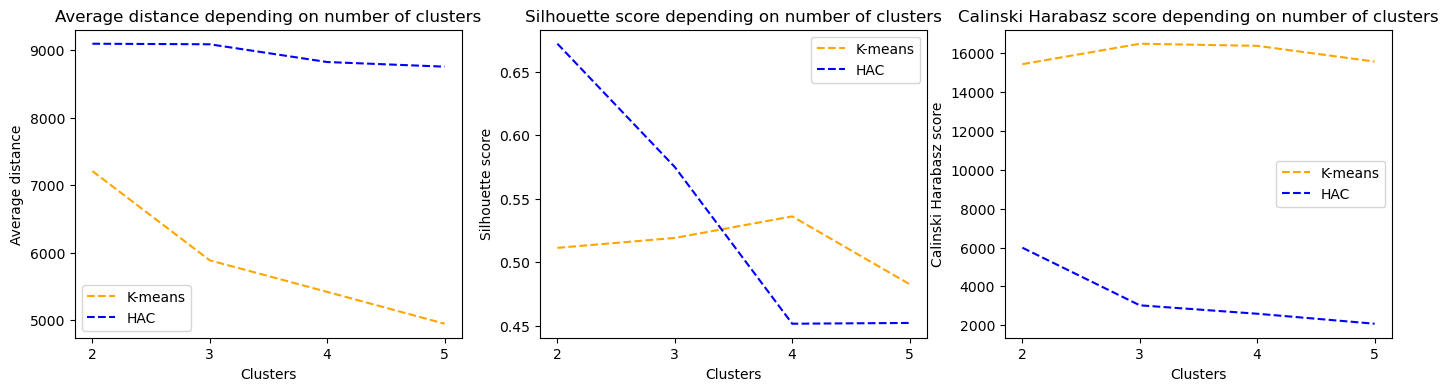

In [5]:
clusts = [2,3,4,5]
plt.figure(figsize=(17,4))
plt.subplot(1, 3, 1);plt.plot(clusts, results_1['dist_k'], '--', color = 'orange',  label ='K-means');plt.plot(clusts, results_1['dist_h'], '--', color = 'blue',  label ='HAC');plt.xticks(clusts);plt.xlabel('Clusters');plt.ylabel('Average distance');plt.title('Average distance depending on number of clusters');plt.legend()
plt.subplot(1, 3, 2);plt.plot(clusts, results_1['sil_k'], '--', color = 'orange',  label ='K-means');plt.plot(clusts, results_1['sil_h'], '--', color = 'blue',  label ='HAC');plt.xticks(clusts);plt.xlabel('Clusters');plt.ylabel('Silhouette score');plt.title('Silhouette score depending on number of clusters');plt.legend()
plt.subplot(1, 3, 3);plt.plot(clusts, results_1['calhar_k'], '--', color = 'orange',  label ='K-means');plt.plot(clusts, results_1['calhar_h'], '--', color = 'blue',  label ='HAC');plt.xticks(clusts);plt.xlabel('Clusters');plt.ylabel('Calinski Harabasz score');plt.title('Calinski Harabasz score depending on number of clusters');plt.legend()
plt.show()

Given the silhouette scores, it seems best to use the K-means method for 4 clusters


Calinski Harabasz in general has higher values in Kmeans than HAC indicated by nature of these two algorithms thus we cannot fully rely only on this measure.

Then we used DBSCAN and OPTICS.
First we computed the average distance in order to estimate the epsilon parameter

In [6]:
D=pdist(data_train, metric='euclidean')
dists=squareform(D, checks=True)
mean_D=sum(D)/len(D)
print("\nAverage distance: ", mean_D)


Average distance:  9897.244974500325


Then we run the DBSCAN algorithm.

In [7]:
df = pd.DataFrame(columns=['Nmin', 'Eps', 'Nclust', 'Clust', 'ShScore'])
for eps in [mean_D/2, mean_D/2.5, mean_D/3]:
    for Nmin in [20, 50, 70]:
        db = DBSCAN(eps=eps, min_samples = Nmin).fit(data_train)
        nclusts=len(set(db.labels_))
        df.loc[len(df.index)] = [Nmin, round(eps), nclusts, np.bincount(1+ db.labels_), silhouette_score(data_train, db.labels_+1)]
print(df.groupby(['Eps', 'Nmin']).head())

   Nmin   Eps  Nclust                         Clust   ShScore
0    20  4949       3              [26, 21105, 132]  0.610825
1    50  4949       2                  [268, 20995]  0.683767
2    70  4949       2                  [329, 20934]  0.677675
3    20  3959       5      [117, 21034, 39, 44, 29]  0.588943
4    50  3959       2                  [551, 20712]  0.652431
5    70  3959       2                  [679, 20584]  0.642602
6    20  3299       6  [340, 20811, 18, 25, 33, 36]  0.364098
7    50  3299       2                  [847, 20416]  0.621054
8    70  3299       4        [995, 19165, 1022, 81]  0.449888


From the silhouette scores are not bad but the results are meaningless as the majority of the elements falls in one  cluster only: this means that DBSCAN doesn't work well in this case. 

We then run the OPTICS algorithm.

In [8]:
samples = [80, 120, 150]
for S in samples:
    clust = OPTICS(min_samples=S)
    clust.fit(data_train)
    labels, counts=np.unique(clust.labels_[clust.ordering_], return_counts=True)
    for i, L in enumerate(labels):
        if L==-1: print("UNDEFINED points:", counts[i])
        break
    print(f'Number of clusters: {len(labels)}')
    print(f'Silhouette score: {silhouette_score(data_train, clust.labels_)}')

/Users/emanueletartaglione/miniconda3/envs/python310/lib/python3.10/site-packages/sklearn/cluster/_optics.py:932: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


UNDEFINED points: 15772
Number of clusters: 31
Silhouette score: -0.3332672282275991
UNDEFINED points: 16664
Number of clusters: 21
Silhouette score: -0.35263650050647605
UNDEFINED points: 17865
Number of clusters: 12
Silhouette score: -0.4223615828887698


Most of the points fall in as noises, silhouette scores are negative which means the algorithm is not good clustering.
We restrained from trying to refine DBSCAN with OPTICS by choosing the best epsilon value because clearly density-based clustering methods are not handling this dataset so well.
Last visual comparison of each method with its best parameters, to choose the best method in general.

In [9]:
import matplotlib.cm as cm
def drawSillouette(X, labels, header="" ):
    y_lower =10
    clusters=list(set(labels))
    n_clusters=len(clusters)
    fig = plt.figure(figsize=(5,3))
    ax1 = plt.gca()
    ax1.set_xlim([-0.5, 1])
    ax1.set_ylim([0, len(X) + (n_clusters) * 3+ y_lower])
    sil_avg = silhouette_score(X, labels)
    silhouette_values = silhouette_samples(X, labels)
    for i,c in enumerate(clusters):
        cs_values = silhouette_values[labels == c]
        cs_values.sort()
        size_ci = cs_values.shape[0]
        y_upper = y_lower + size_ci
        color = cm.nipy_spectral(i / n_clusters) #np.array(["r", "g", "b", "k", "y"])[i] #
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, cs_values, facecolor=color, edgecolor="k", alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_ci, str(c))
        y_lower = y_upper + 3  # 10 for the 0 samples
    ax1.set_title("Silhouette plot "+ header);ax1.set_xlabel("Silhouette coefficient");ax1.set_ylabel("Clusters");ax1.axvline(x=sil_avg, c="r", linestyle="--");ax1.set_yticks([]) 
    plt.show()


/Users/emanueletartaglione/miniconda3/envs/python310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


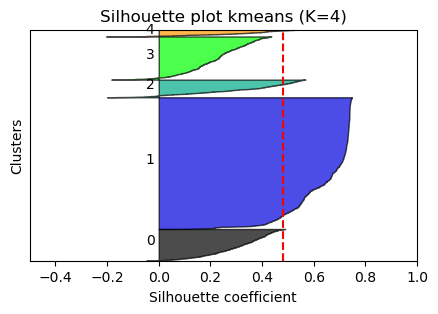

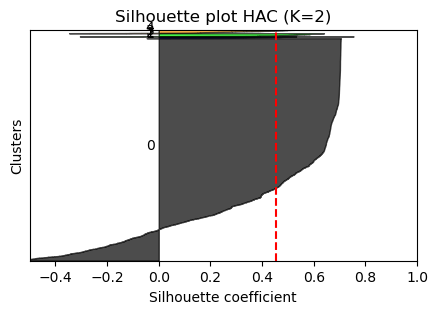

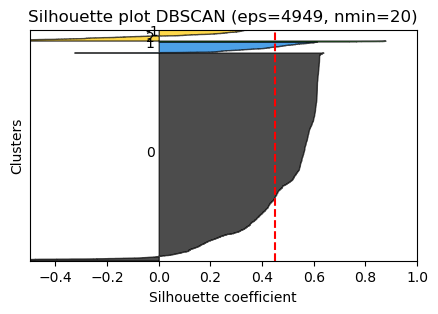

/Users/emanueletartaglione/miniconda3/envs/python310/lib/python3.10/site-packages/sklearn/cluster/_optics.py:932: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


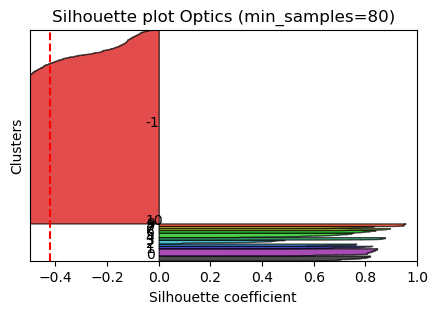

In [10]:

kms_t = KMeans(n_clusters=4, random_state=0).fit(data_train);drawSillouette(data_train, kms.labels_, "kmeans (K=4)")
hac_t = AgglomerativeClustering(linkage="average", n_clusters=2).fit(data_train);drawSillouette(data_train, hac.labels_, "HAC (K=2)")
db_t = DBSCAN(eps=mean_D/2, min_samples=20).fit(data_train);drawSillouette(data_train, db.labels_, "DBSCAN (eps=4949, nmin=20)")
clust_T = OPTICS(min_samples=80).fit(data_train);drawSillouette(data_train, clust.labels_, "Optics (min_samples=80)")

Kmeans seems the best and rest seems shit

Now same with unique dataset:

In [11]:
methods = ['single', 'average', 'complete', 'ward']
for method in methods:
    hac = AgglomerativeClustering(linkage=method, n_clusters=4).fit(data_unique)
    sil_h = silhouette_score(data_unique, hac.labels_)   
    print(f"Method {method} silhouette score - {round(sil_h,4)}")

Method single silhouette score - 0.909
Method average silhouette score - 0.9105
Method complete silhouette score - 0.8635
Method ward silhouette score - 0.8752


In [12]:
results_2 = {'sil_k': [], 'sil_h': [], 'calhar_k': [], 'calhar_h': [], 'dist_k': [], 'dist_h': []}
for K in range(2,6):
    kms = KMeans(n_clusters=K, random_state=0).fit(data_unique)
    hac = AgglomerativeClustering(linkage="average", n_clusters=K).fit(data_unique)
    sil_k = silhouette_score(data_unique, kms.labels_);results_2['sil_k'].append(sil_k)
    sil_h = silhouette_score(data_unique, hac.labels_);results_2['sil_h'].append(sil_h)
    calhar_k = calinski_harabasz_score(data_unique, kms.labels_);results_2['calhar_k'].append(calhar_k)
    calhar_h = calinski_harabasz_score(data_unique, hac.labels_);results_2['calhar_h'].append(calhar_h)
    dist_k = avgDist(data_unique, kms.labels_);results_2['dist_k'].append(dist_k)
    dist_h = avgDist(data_unique, hac.labels_);results_2['dist_h'].append(dist_h)

/Users/emanueletartaglione/miniconda3/envs/python310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/emanueletartaglione/miniconda3/envs/python310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/emanueletartaglione/miniconda3/envs/python310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/emanueletartaglione/miniconda3/envs/python310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from

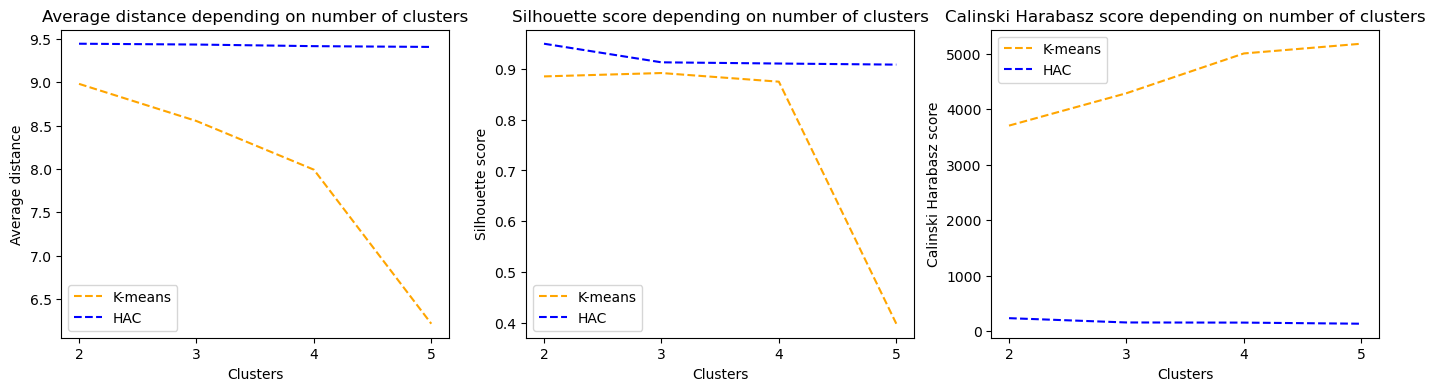

In [13]:
clusts = [2,3,4,5]
plt.figure(figsize=(17,4))
plt.subplot(1, 3, 1);plt.plot(clusts, results_2['dist_k'], '--', color = 'orange',  label ='K-means');plt.plot(clusts, results_2['dist_h'], '--', color = 'blue',  label ='HAC');plt.xticks(clusts);plt.xlabel('Clusters');plt.ylabel('Average distance');plt.title('Average distance depending on number of clusters');plt.legend()
plt.subplot(1, 3, 2);plt.plot(clusts, results_2['sil_k'], '--', color = 'orange',  label ='K-means');plt.plot(clusts, results_2['sil_h'], '--', color = 'blue',  label ='HAC');plt.xticks(clusts);plt.xlabel('Clusters');plt.ylabel('Silhouette score');plt.title('Silhouette score depending on number of clusters');plt.legend()
plt.subplot(1, 3, 3);plt.plot(clusts, results_2['calhar_k'], '--', color = 'orange',  label ='K-means');plt.plot(clusts, results_2['calhar_h'], '--', color = 'blue',  label ='HAC');plt.xticks(clusts);plt.xlabel('Clusters');plt.ylabel('Calinski Harabasz score');plt.title('Calinski Harabasz score depending on number of clusters');plt.legend()
plt.show()

silhouette scores good for both HAC and K-means (both over 90), Calinkski Harabasz when number of clusters increases is better for k-means. So at the end of the day, since there is not much difference between k-means and HAC when is 5 clusters (that is also a very good value for the avg distance intra cluster for k-mean), we would choose k-means as approach

In [14]:
D=pdist(data_unique, metric='euclidean')
dists=squareform(D, checks=True)
mean_D=sum(D)/len(D)
print("\nAverage distance: ", mean_D)


Average distance:  9.46168576214303


In [15]:
df_2 = pd.DataFrame(columns=['Nmin', 'Eps', 'Nclust', 'Clust', 'ShScore'])
for eps in [mean_D/1.5, mean_D/2, mean_D/2.5]:
    for Nmin in [20, 50, 70]:
        db = DBSCAN(eps=eps, min_samples=Nmin).fit(data_unique)
        nclusts=len(set(db.labels_))
        df_2.loc[len(df_2.index)] = [Nmin, round(eps), nclusts, np.bincount(1+ db.labels_), silhouette_score(data_train, db.labels_+1)]
print(df_2.groupby(['Eps', 'Nmin']).head())

   Nmin  Eps  Nclust                                              Clust  \
0    20    6       9          [546, 20373, 105, 61, 28, 19, 29, 39, 63]   
1    50    6       5                          [710, 20324, 105, 61, 63]   
2    70    6       3                                  [839, 20319, 105]   
3    20    5      11  [669, 20168, 104, 61, 24, 22, 63, 26, 35, 63, 28]   
4    50    5       6                      [820, 20157, 103, 61, 59, 63]   
5    70    5       3                                 [1040, 20120, 103]   
6    20    4      10       [823, 20036, 40, 99, 61, 24, 63, 21, 35, 61]   
7    50    4       6                       [981, 20008, 99, 61, 53, 61]   
8    70    4       3                                  [1251, 19913, 99]   

    ShScore  
0 -0.053877  
1  0.049853  
2  0.107948  
3 -0.191499  
4  0.053915  
5  0.111743  
6 -0.568400  
7  0.052268  
8  0.106783  


silhouette scores are bad, and also the division into clusters is bad for DBSCAN

In [16]:
samples = [80,120,150]
for S in samples:
    clust = OPTICS(min_samples=S)
    clust.fit(data_unique)
    labels, counts=np.unique(clust.labels_[clust.ordering_], return_counts=True)
    for i, L in enumerate(labels):
        if L==-1: print("UNDEFINED points:", counts[i])
        break
    print(f'Number of clusters: {len(labels)-1}')
    print(f'Silhouette score: {silhouette_score(data_unique, clust.labels_)}')

/Users/emanueletartaglione/miniconda3/envs/python310/lib/python3.10/site-packages/sklearn/cluster/_optics.py:932: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


UNDEFINED points: 14261
Number of clusters: 44
Silhouette score: -0.24999698870047232
UNDEFINED points: 14823
Number of clusters: 28
Silhouette score: -0.2760937040978286
UNDEFINED points: 15701
Number of clusters: 21
Silhouette score: -0.330924127339061


OPTICS results: bad. silhouette scores very low and a lot of undefined points.

/Users/emanueletartaglione/miniconda3/envs/python310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


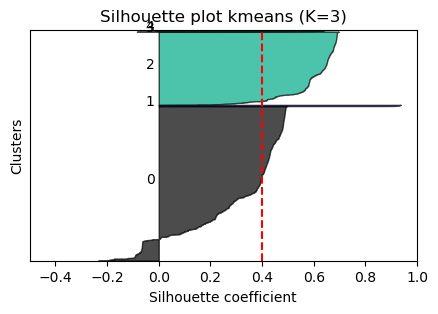

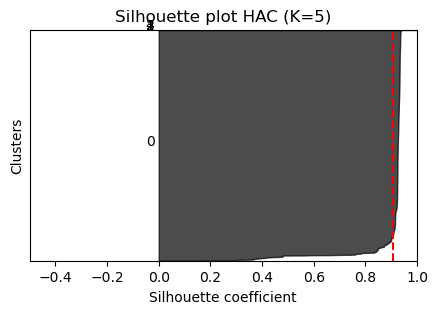

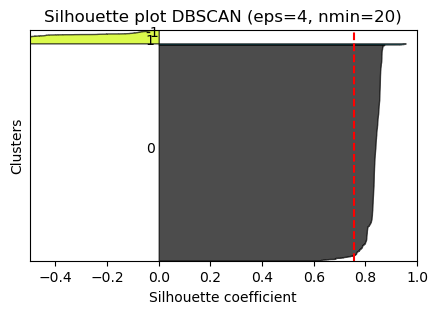

/Users/emanueletartaglione/miniconda3/envs/python310/lib/python3.10/site-packages/sklearn/cluster/_optics.py:932: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


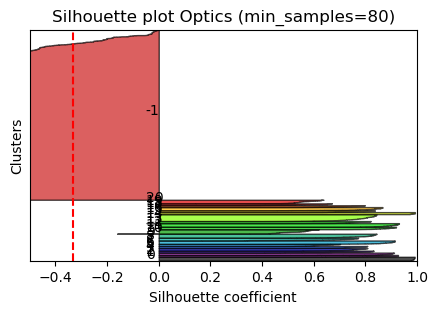

In [17]:
kms_u = KMeans(n_clusters=2, random_state=0).fit(data_unique);drawSillouette(data_unique, kms.labels_, "kmeans (K=2)")
hac_u = AgglomerativeClustering(linkage="average", n_clusters=5).fit(data_unique);drawSillouette(data_unique, hac.labels_, "HAC (K=5)")
db_u = DBSCAN(eps=4, min_samples=20).fit(data_unique);drawSillouette(data_unique, db.labels_, "DBSCAN (eps=4, nmin=20)")
clust_u = OPTICS(min_samples=80).fit(data_unique);drawSillouette(data_unique, clust.labels_, "Optics (min_samples=80)")

Conclude which approach is best for train dataset and which for unique and whats the difference in results:

for train dataset best approach = HAC with 5 clusters (even though silhouette score low)
for unique dataset best approach = K-means with 5 clusters (silhouette score high)

In this first part we can conclude that distance based methods work better than the others (DBSCAN and OPTICS). 

### OBJECTIVE 2

In [18]:
y_train = data_train_y.copy()
for i in y_train.index:
    if y_train[i] < 1:
        y_train[i] = "VeryLow" 
    elif 1 <= y_train[i] < 5:
        y_train[i] = "Low" 
    elif 5 <= y_train[i] < 20:
        y_train[i] = "Medium"
    elif 20 <= y_train[i] < 100:
        y_train[i] = "High"
    else:
        y_train[i] = "VeryHigh"

y_train = y_train.values



With the clusters produced in objective 2, using extrinsic methods, verify the quality of each model, for both the train.csv and the unique_m.csv clusters

Same with dataset unique

In [19]:
y_unique = data_unique_y.copy()
for i in y_unique.index:
    if y_unique[i] < 1:
        y_unique[i] = "VeryLow" 
    elif 1 <= y_unique[i] < 5:
        y_unique[i] = "Low" 
    elif 5 <= y_unique[i] < 20:
        y_unique[i] = "Medium"
    elif 20 <= y_unique[i] < 100:
        y_unique[i] = "High"
    else:
        y_unique[i] = "VeryHigh"

y_unique = y_unique.values

EXTRINSIC METHODS TRAIN DATASET

In [21]:
print("Kmeans Homogeneity score", homogeneity_score(y_train, kms_t.labels_))
print("   HAC Homogeneity score", homogeneity_score(y_train, hac_t.labels_))
print("DBSCAN Homogeneity score", homogeneity_score(y_train, db_t.labels_))
print("OPTICS Homogeneity score", homogeneity_score(y_train, clust_T.labels_))

Kmeans Homogeneity score 0.22333995332072978
   HAC Homogeneity score 0.018757657377691417
DBSCAN Homogeneity score 0.0065308686181648245
OPTICS Homogeneity score 0.12271827716319046


In [22]:
print("Kmeans Completeness score", completeness_score(y_train, kms_t.labels_))
print("   HAC Completeness score", completeness_score(y_train, hac_t.labels_))
print("DBSCAN Completeness score", completeness_score(y_train, db_t.labels_))
print("OPTICS Completeness score", completeness_score(y_train, clust_T.labels_))

Kmeans Completeness score 0.29332390331583374
   HAC Completeness score 0.22830435919084696
DBSCAN Completeness score 0.17859377133121
OPTICS Completeness score 0.11398341070306726


In [23]:
print("Kmeans V-measure score", v_measure_score(y_train, kms_t.labels_))
print("   HAC V-measure score", v_measure_score(y_train, hac_t.labels_))
print("DBSCAN V-measure score", v_measure_score(y_train, db_t.labels_))
print("OPTICS V-measure score", v_measure_score(y_train, clust_T.labels_))

Kmeans V-measure score 0.2535921413233087
   HAC V-measure score 0.03466704438840594
DBSCAN V-measure score 0.01260094233707265
OPTICS V-measure score 0.11818967505266169


EXTRINSIC METHOD UNIQUE DATASET

In [24]:
print("Kmeans Homogeneity score", homogeneity_score(y_unique, kms_u.labels_))
print("   HAC Homogeneity score", homogeneity_score(y_unique, hac_u.labels_))
print("DBSCAN Homogeneity score", homogeneity_score(y_unique, db_u.labels_))
print("OPTICS Homogeneity score", homogeneity_score(y_unique, clust_u.labels_))

Kmeans Homogeneity score 0.007347407540523093
   HAC Homogeneity score 0.0003217939990387148
DBSCAN Homogeneity score 0.02314718353319746
OPTICS Homogeneity score 0.18618102665865244


In [25]:
print("Kmeans Completeness score", completeness_score(y_unique, kms_u.labels_))
print("   HAC Completeness score", completeness_score(y_unique, hac_u.labels_))
print("DBSCAN Completeness score", completeness_score(y_unique, db_u.labels_))
print("OPTICS Completeness score", completeness_score(y_unique, clust_u.labels_))

Kmeans Completeness score 0.1765592557836769
   HAC Completeness score 0.1651049115528475
DBSCAN Completeness score 0.10298879508280018
OPTICS Completeness score 0.129520164001802


In [26]:
print("Kmeans V-measure score", v_measure_score(y_unique, kms_u.labels_))
print("   HAC V-measure score", v_measure_score(y_unique, hac_u.labels_))
print("DBSCAN V-measure score", v_measure_score(y_unique, db_u.labels_))
print("OPTICS V-measure score", v_measure_score(y_unique, clust_u.labels_))

Kmeans V-measure score 0.014107730343704513
   HAC V-measure score 0.0006423360674720068
DBSCAN V-measure score 0.03779889874088777
OPTICS V-measure score 0.15276595603839857


I do not think we need every measure, we need to evaluate just what were the best in the first part, but since the code is still running, I just copied everything just in case.